<a href="https://colab.research.google.com/github/CHIN-HUA/ML/blob/master/pll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install control


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 25.8 MB/s eta 0:00:00


Corrected Values: Rp = 5957.39 Ω, Cp = 1.60e-09 F, Cs = 1.07e-10 F


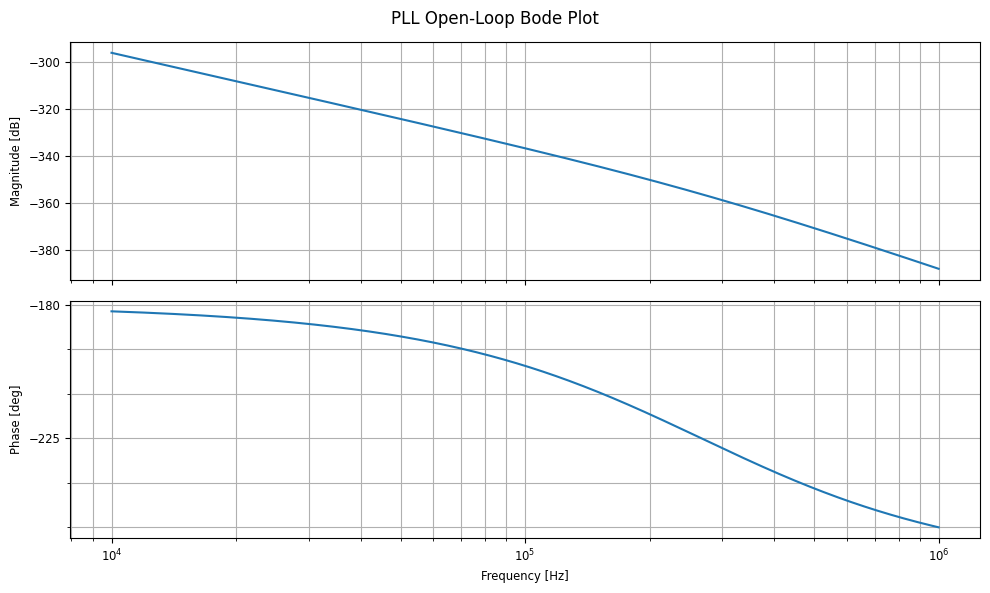

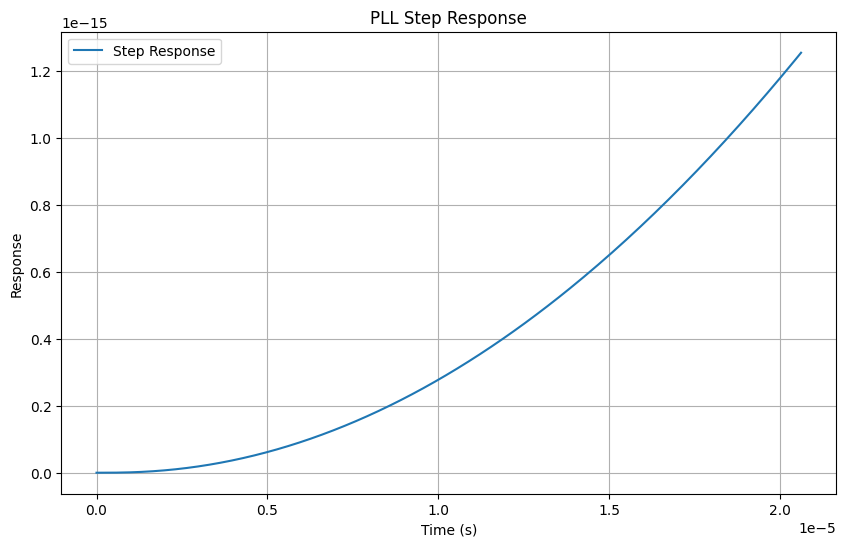

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Given PLL parameters
Fref = 1e6  # Reference Frequency (Hz)
Fout0 = 2.4e9  # Output Frequency (Hz)
N = Fout0 / Fref  # Divider ratio
Kvco = 150e6  # VCO gain (Hz/V)
Ip = 1.2e-3  # Charge pump current (A)
Gamma = 4  # Damping factor

# Loop bandwidth calculation
BW = Fref / 15  # Ensure loop bandwidth constraint
wz = BW / Gamma * 2 * np.pi  # Characteristic frequency

# Compute Rp, Cp, Cs
Rp = (BW * 2 * np.pi * N / (Ip * Kvco)) * (Gamma**2 / (Gamma**2 - 1))
Cp = 1 / (Rp * wz)
Cs = Cp / (Gamma**2 - 1)

# Display corrected values
print(f"Corrected Values: Rp = {Rp:.2f} Ω, Cp = {Cp:.2e} F, Cs = {Cs:.2e} F")

# Define the Loop Filter Transfer Function
s = ctrl.TransferFunction.s
Zf = Rp + 1/(s*Cp) + (1/(s*Cs))  # Impedance of RC Network
Hf = 1 / (1 + Zf * (s * Ip / (2 * np.pi)))  # Loop Filter Transfer Function

# Define the Open Loop Transfer Function
G_open = (Ip / (s * 2 * np.pi)) * Hf * (Kvco / s) * (1 / N)

# Define the Closed Loop Transfer Function
G_closed = G_open / (1 + G_open)

# Plot Bode Plot
plt.figure(figsize=(10,6))
ctrl.bode_plot(G_open, dB=True, Hz=True, deg=True)
plt.suptitle("PLL Open-Loop Bode Plot")
plt.show()

# Step Response (Lock Time)
time, response = ctrl.step_response(G_closed)
plt.figure(figsize=(10,6))
plt.plot(time, response, label="Step Response")
plt.xlabel("Time (s)")
plt.ylabel("Response")
plt.title("PLL Step Response")
plt.grid()
plt.legend()
plt.show()
